# 1.Problem Statement

### CAR PRICE PREDICTION
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. This project contains two phaseData Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.
more the data better the model

In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and
at last target variable Price of the car. This data is to give you a hint about important variables in
used car model. You can make changes to it, you can add or you can remove some columns, it
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan,
Hatchback.

Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
Model Building Phase

]After collecting the data, you need to build a machine learning model. Before model building do all
data pre-processing steps. Try different models with different hyper parameters and select the best
model.

#### Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

# Import basic libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# 2. Load and read dataset

In [4]:
df=pd.read_csv(r'Cars24.csv')
df.head()

,Unnamed: 0,Brand,model,variant,Transmission,Year of Manufacturing,Driven_in_km,Fuel_type,Number of owner,Location,Price
0,0,Elite,Hyundai,ASTA 1.4 CRDI,Manual,2016,43221,Diesel,2,Bengaluru,686299
1,1,Baleno,Maruti,DELTA 1.2 K12,Manual,2016,13400,Petrol,1,Bengaluru,625599
2,2,Swift,Maruti,ZDI AMT,Automatic,2018,78534,Diesel,1,Bengaluru,746099
3,3,Verna,Hyundai,1.6 SX VTVT,Manual,2017,29525,Petrol,1,Bengaluru,903199
4,4,Ameo,Volkswagen,HIGHLINE 1.5,Manual,2016,56225,Diesel,1,Bengaluru,618999


The Dataset is loaded successfully

# Shape of the data set

In [5]:
df.shape

(4533, 11)

The dataset contain 11 rows with 4533 columns

# Cosine summary of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             4533 non-null   int64 
 1   Brand                  4533 non-null   object
 2   model                  4533 non-null   object
 3   variant                4533 non-null   object
 4   Transmission           4533 non-null   object
 5   Year of Manufacturing  4533 non-null   int64 
 6   Driven_in_km           4533 non-null   int64 
 7   Fuel_type              4533 non-null   object
 8   Number of owner        4533 non-null   int64 
 9   Location               4533 non-null   object
 10  Price                  4533 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 389.7+ KB


The dataset seems to be a combination of both categorical data nad numerical data.

# Check for null values

In [7]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
model                    0
variant                  0
Transmission             0
Year of Manufacturing    0
Driven_in_km             0
Fuel_type                0
Number of owner          0
Location                 0
Price                    0
dtype: int64

No null calues are found in the dataset

# Check for Duplicates

In [8]:
df.duplicated().sum()

0

No duplicates are found in the dataset

# Statistical Summary of the dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4533.0,2266.000000,1308.708715,0.0,1133.0,2266.0,3399.0,4532.0
Year of Manufacturing,4533.0,2016.578866,2.238881,2007.0,2015.0,2017.0,2018.0,2021.0
Driven_in_km,4533.0,45660.038165,32968.244574,58.0,22192.0,38846.0,61499.0,280921.0
Number of owner,4533.0,1.234061,0.480112,1.0,1.0,1.0,1.0,4.0
Price,4533.0,607334.737922,311146.446567,120399.0,405499.0,529399.0,700299.0,3506099.0


Statistical insight of the numerical features

# 3. Data Preprocessing

In [10]:
df.drop(['Unnamed: 0'], axis =1, inplace =True)

Above, I droped the unwanted column

In [11]:
df=df.rename(columns = {'Brand':'Model', 'model':'Brand'})

Above, I corrected the feature names according to their actual belonging

In [12]:
df.Brand.replace(to_replace=dict(RENAULT='Renault', HYUNDAI='Hyundai'), inplace=True)

In the dataset, as the dataset contains Hyundai and HYUNDAI aslo Renault and RENAULT, both are same so I replaced and mearge it into one i.e., Renault and Hyundai 

In [13]:
df.head()

,Model,Brand,variant,Transmission,Year of Manufacturing,Driven_in_km,Fuel_type,Number of owner,Location,Price
0,Elite,Hyundai,ASTA 1.4 CRDI,Manual,2016,43221,Diesel,2,Bengaluru,686299
1,Baleno,Maruti,DELTA 1.2 K12,Manual,2016,13400,Petrol,1,Bengaluru,625599
2,Swift,Maruti,ZDI AMT,Automatic,2018,78534,Diesel,1,Bengaluru,746099
3,Verna,Hyundai,1.6 SX VTVT,Manual,2017,29525,Petrol,1,Bengaluru,903199
4,Ameo,Volkswagen,HIGHLINE 1.5,Manual,2016,56225,Diesel,1,Bengaluru,618999


# 4. Data Visualization

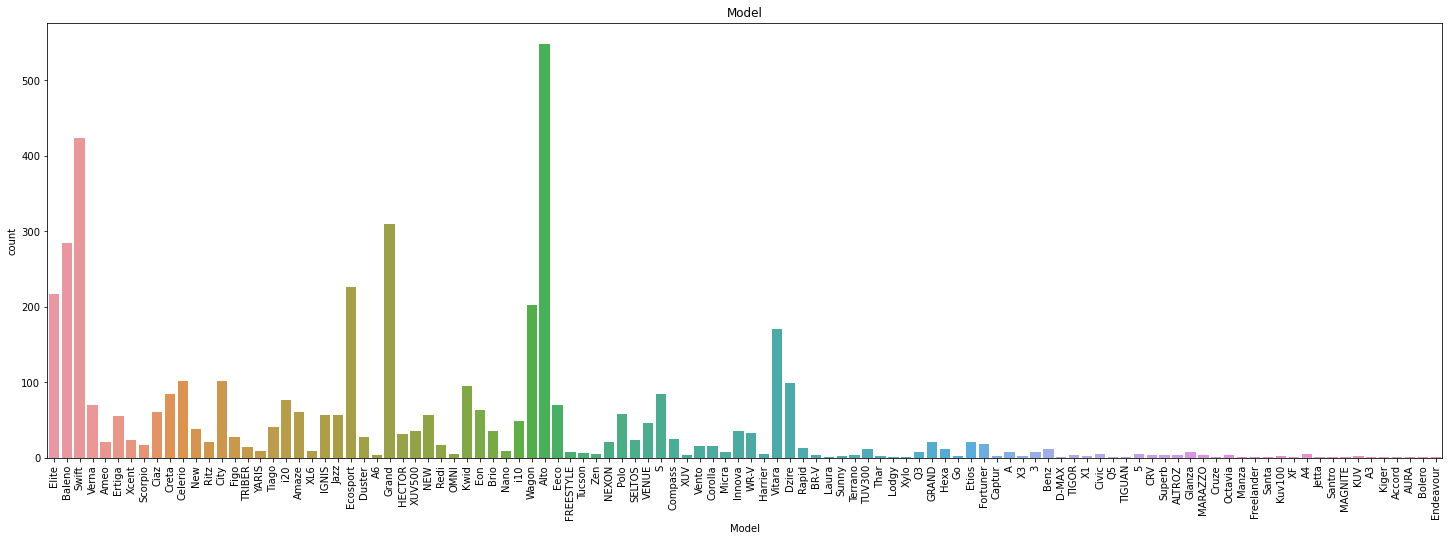

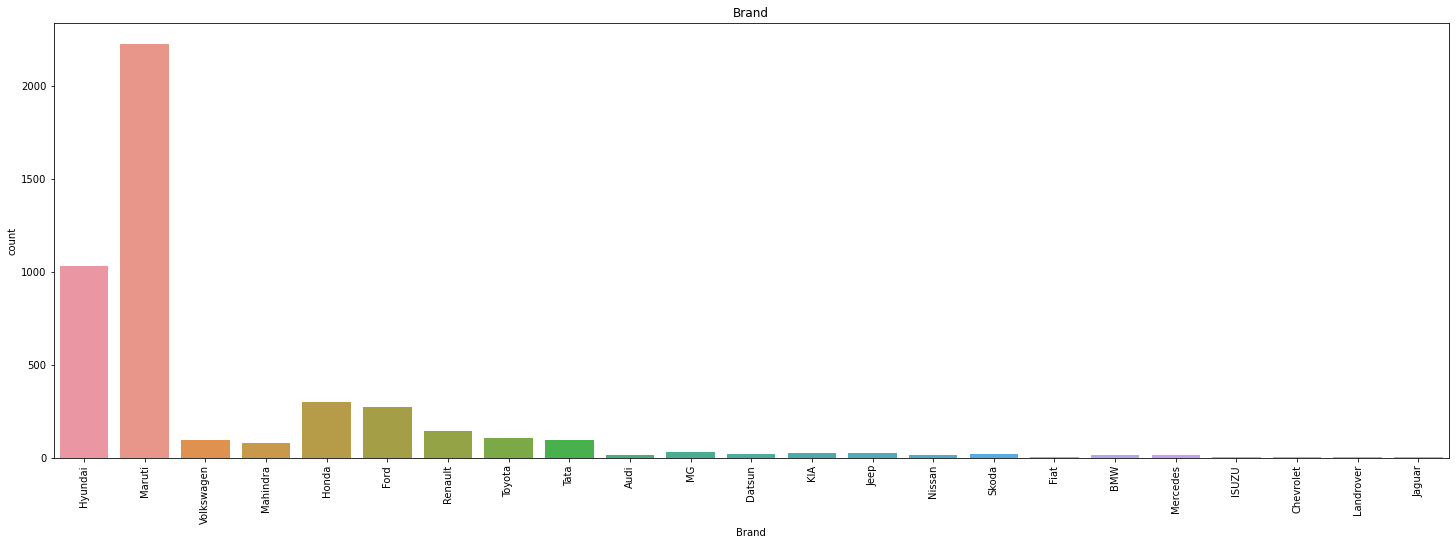

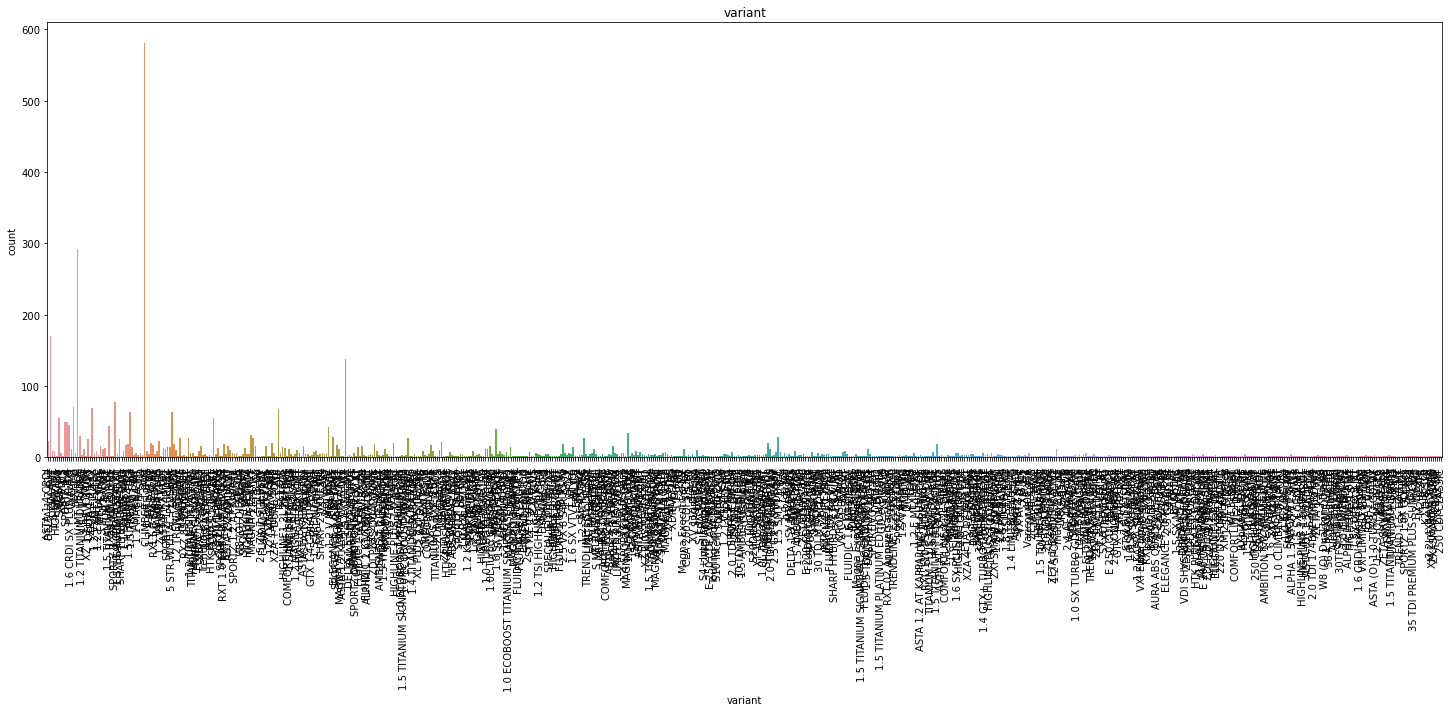

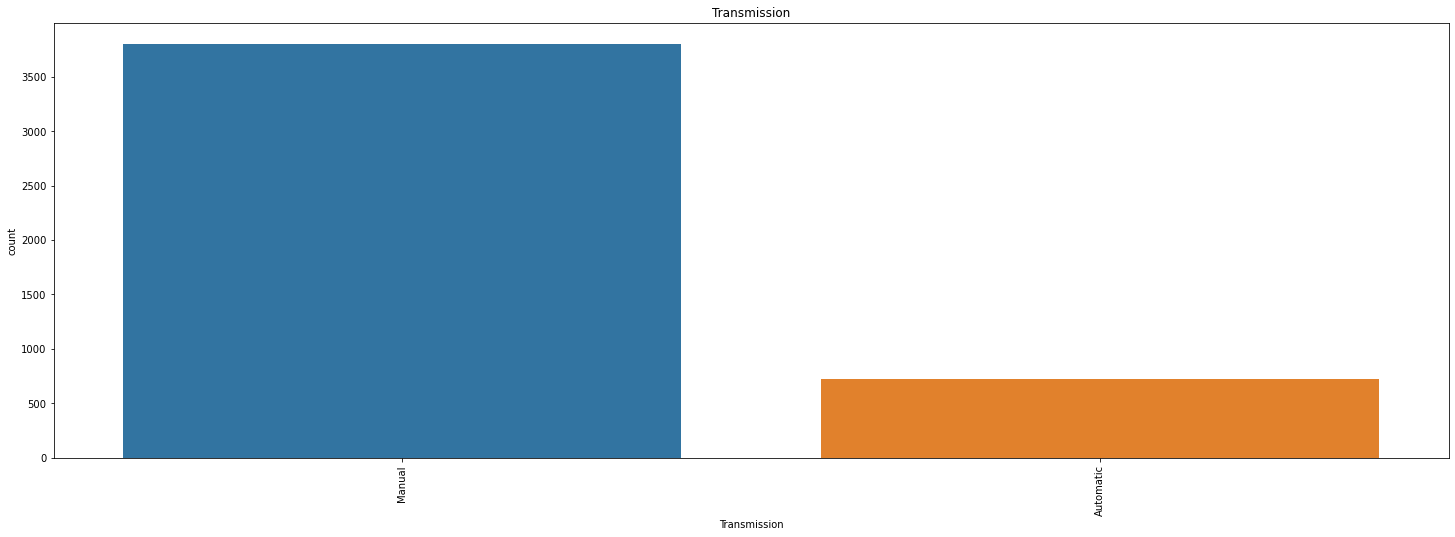

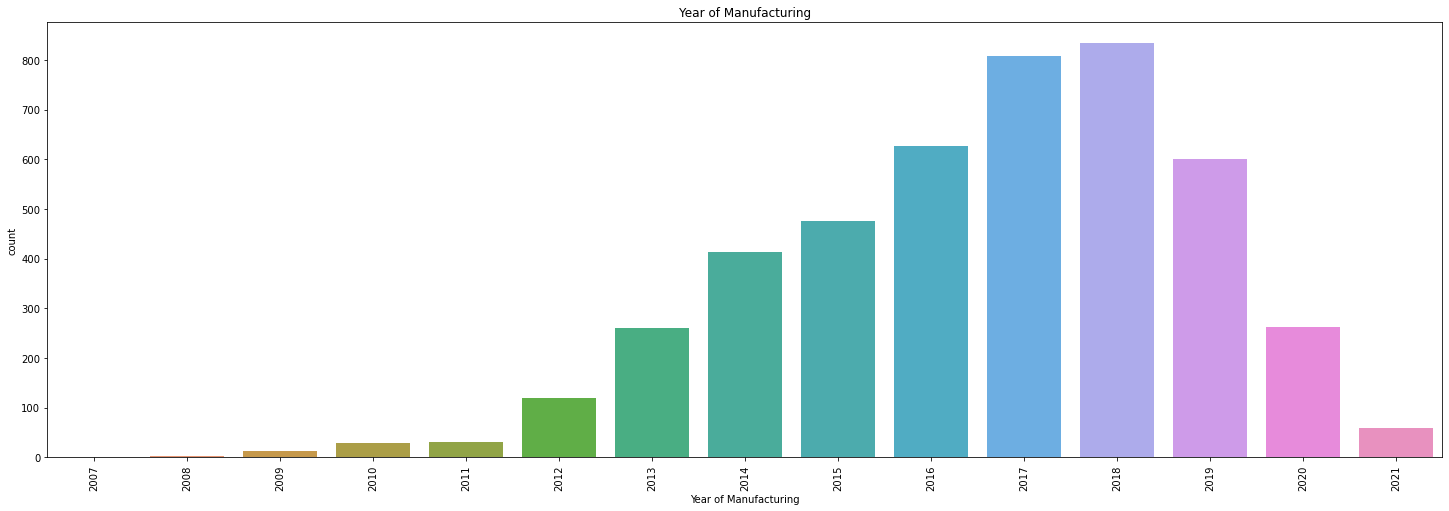

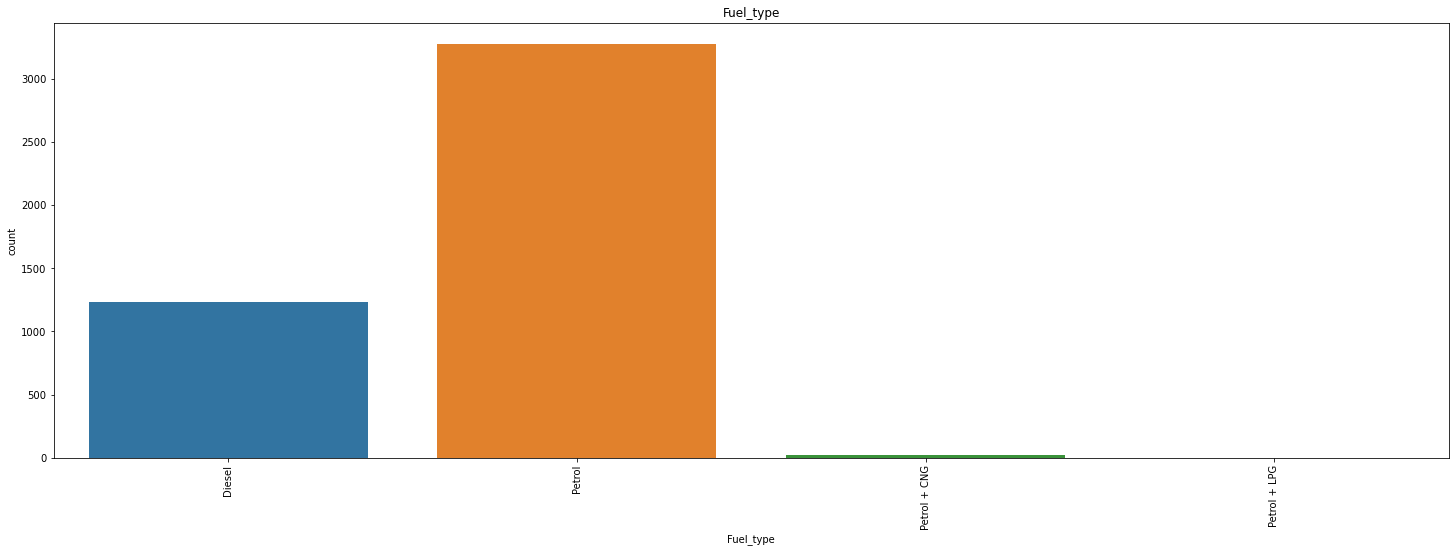

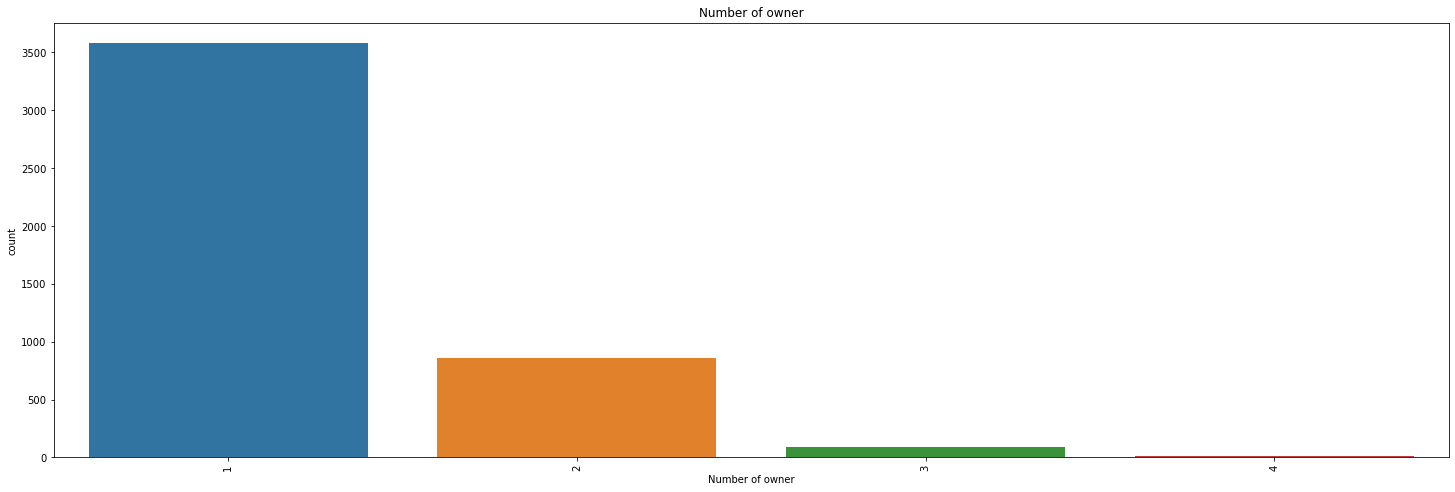

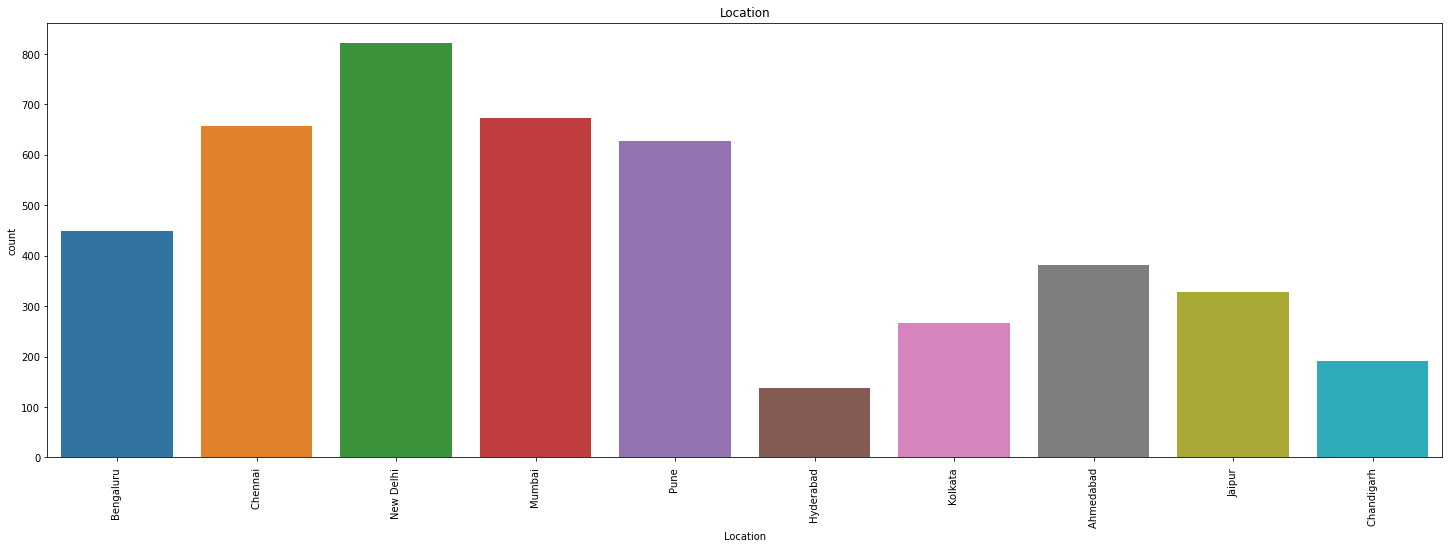

In [18]:
liste=['Model','Brand','variant', 'Transmission', 'Year of Manufacturing', 'Fuel_type', 'Number of owner', 'Location']
for i in liste:
    plt.figure(figsize=(25,8))
    sns.countplot(x=df[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

* The above graph shows the count of all the different types of fuel used
* The above graph shows the count of number of owners
* The above graph shows the number of car manufactured in different years
* The above graph shows the count of cars having different transmission

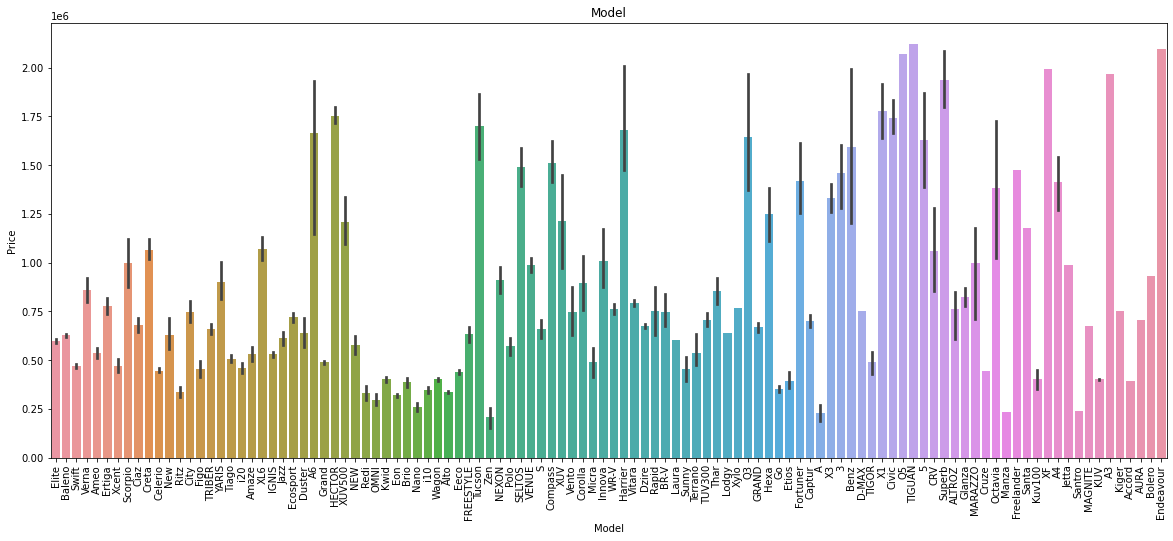

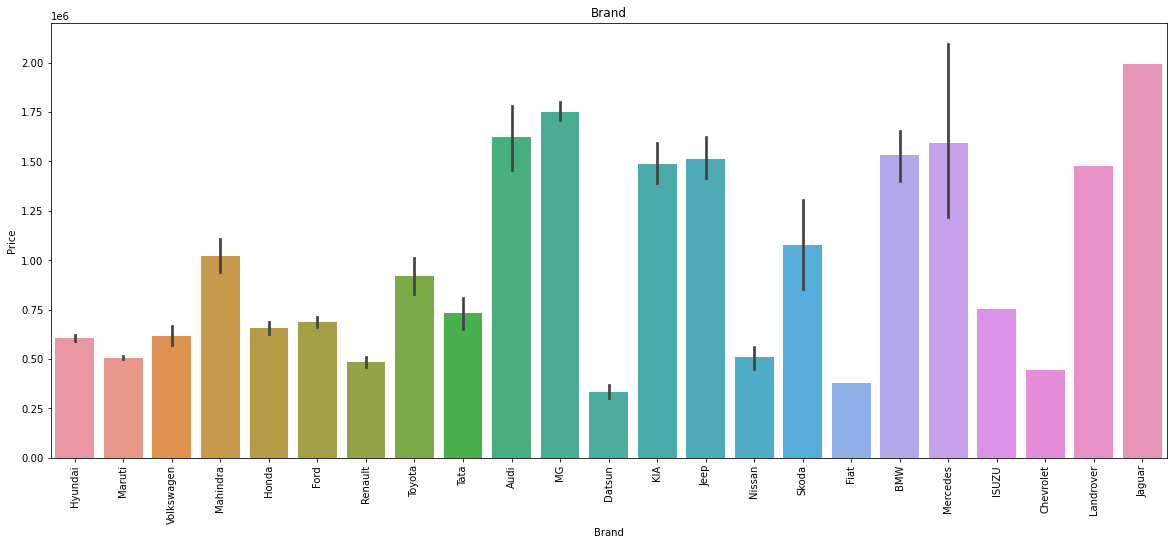

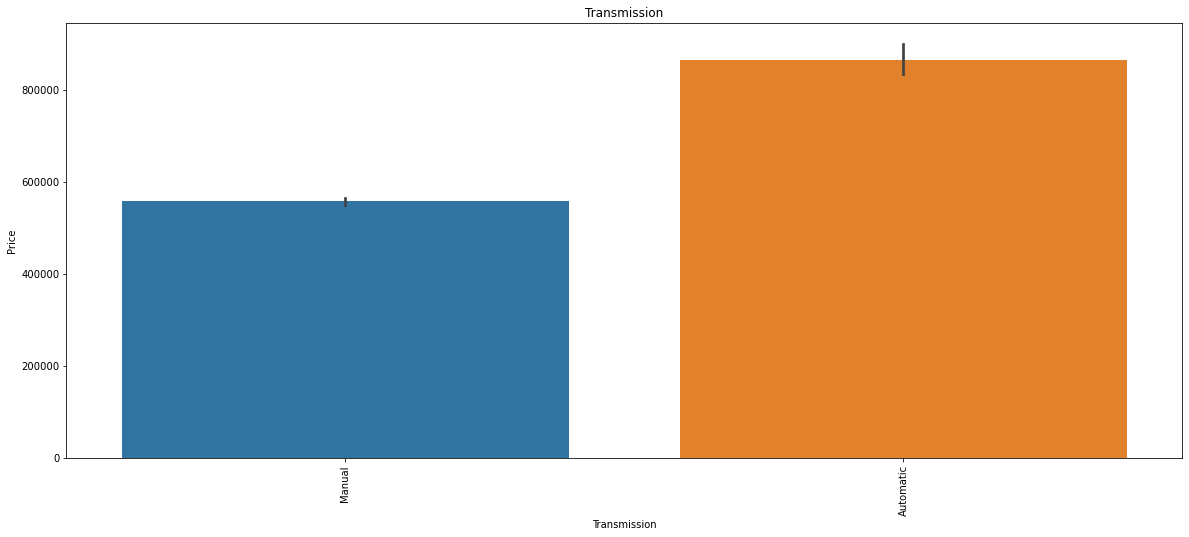

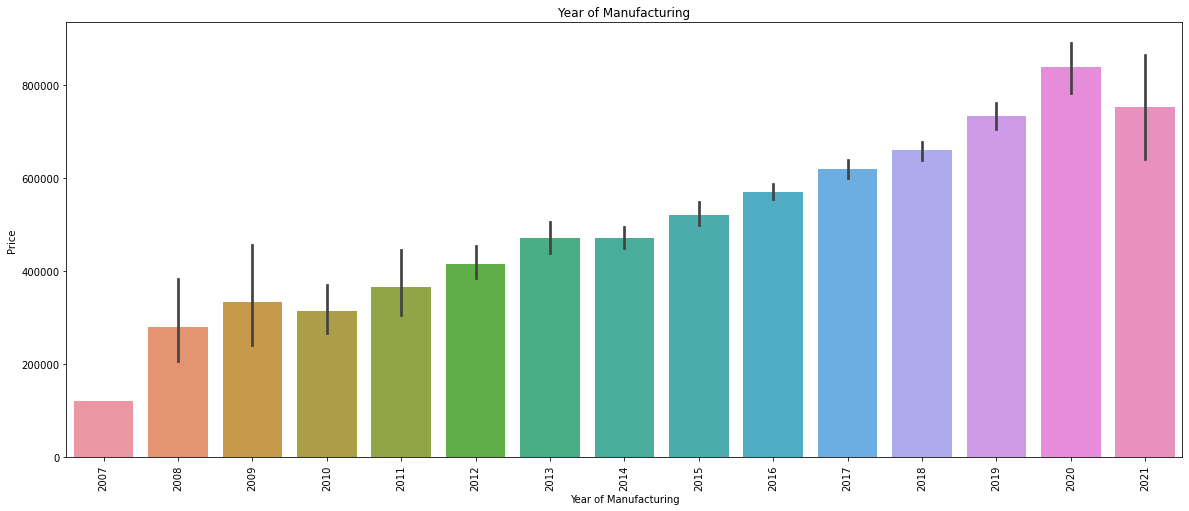

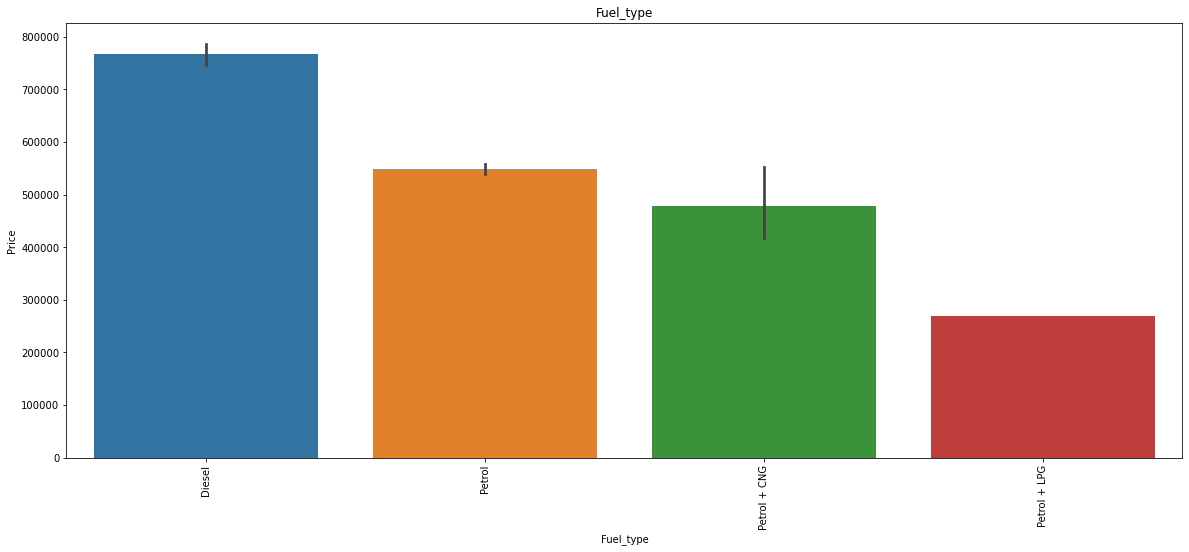

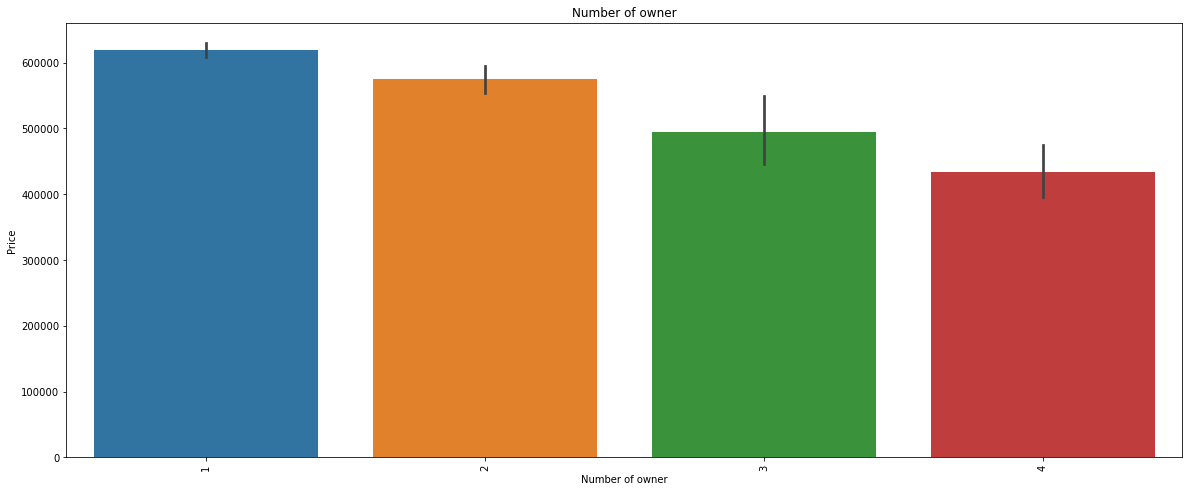

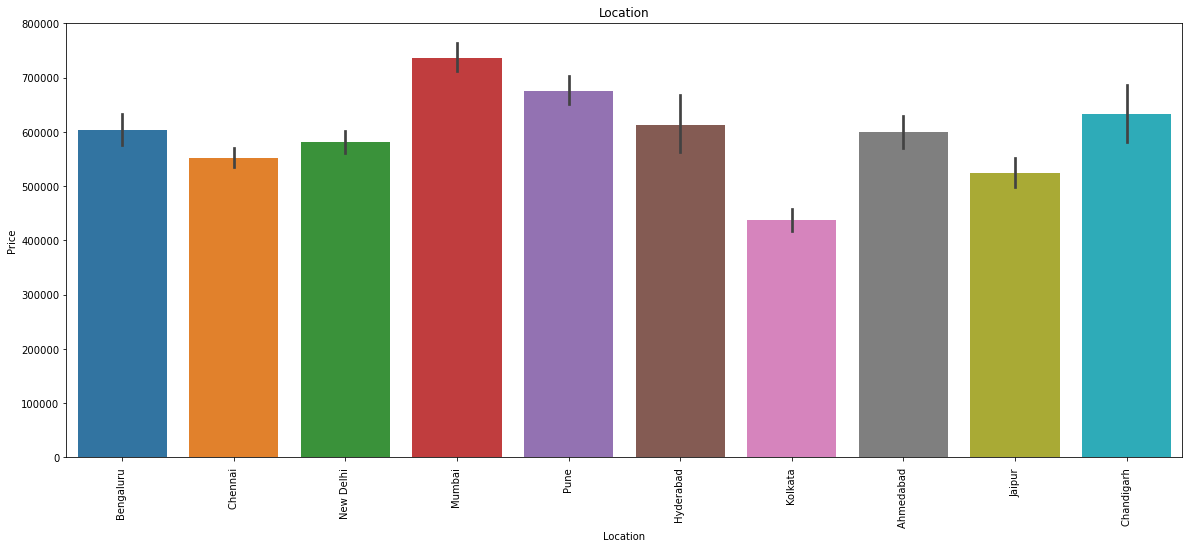

In [19]:
liste=['Model','Brand', 'Transmission', 'Year of Manufacturing', 'Fuel_type', 'Number of owner', 'Location']
for i in liste:
    plt.figure(figsize=(20,8))
    sns.barplot(x=df[i],y='Price',data=df)
    plt.xlabel(i)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

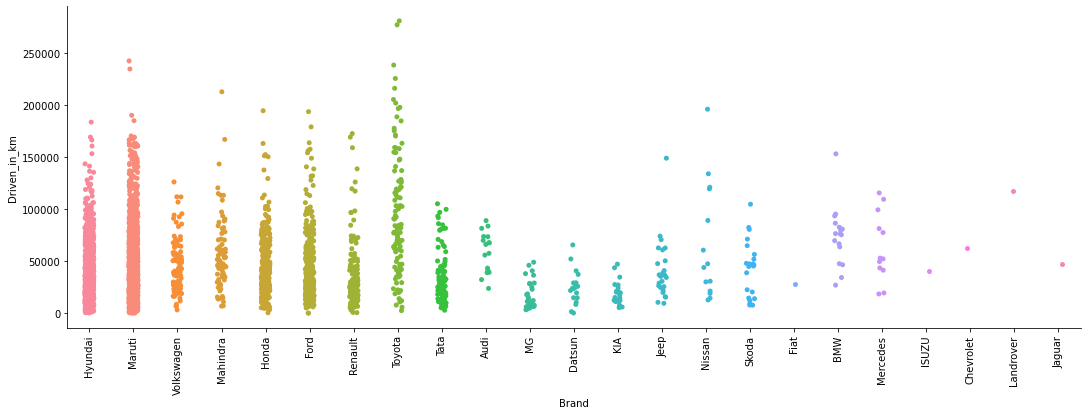

In [13]:
sns.catplot(x=df['Brand'], y=df['Driven_in_km'], data=df, height=5, aspect=3)
ax = plt.xticks(rotation=90)
plt.show()

The above graph shows how many km did the cars of the different brand travelled.

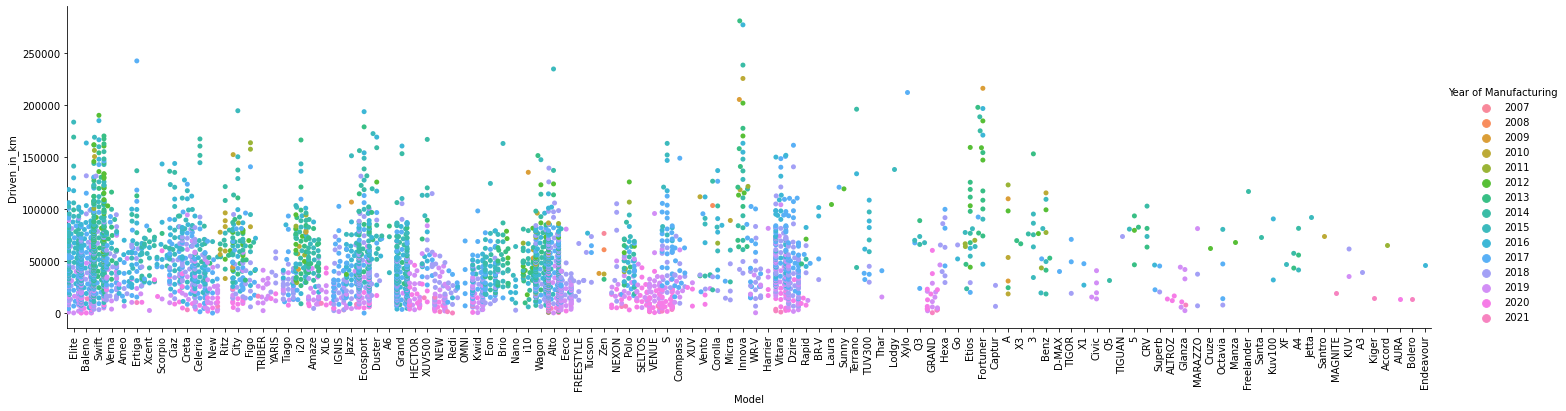

In [17]:
sns.catplot(x = 'Model', y = 'Driven_in_km', data = df, kind = 'swarm', hue = 'Year of Manufacturing', height=5, aspect=4)
plt.xticks(rotation=90)
plt.show()

The above graph shows how many km did the car model which are manufactured in different years travelled.

# 6. Feature Engineering

### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['Model']=encoder.fit_transform(df['Model'])
df['Brand']=encoder.fit_transform(df['Brand'])
df['variant']=encoder.fit_transform(df['variant'])
df['Transmission']=encoder.fit_transform(df['Transmission'])
df['Fuel_type']=encoder.fit_transform(df['Fuel_type'])
df['Location']=encoder.fit_transform(df['Location'])

In [20]:
df.head()

,Model,Brand,variant,Transmission,Year of Manufacturing,Driven_in_km,Fuel_type,Number of owner,Location,Price
0,32,7,247,1,2016,43221,0,2,1,686299
1,13,15,272,1,2016,13400,1,1,1,625599
2,81,15,619,0,2018,78534,0,1,1,746099
3,92,7,145,1,2017,29525,1,1,1,903199
4,11,22,333,1,2016,56225,0,1,1,618999


Above, I have encoded all the categorical features (object types) into numbers using LabelEncoder

### Finding outiers

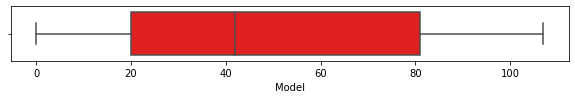

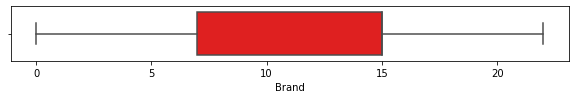

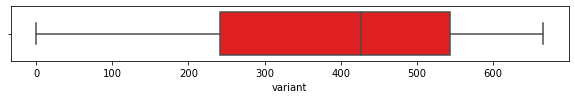

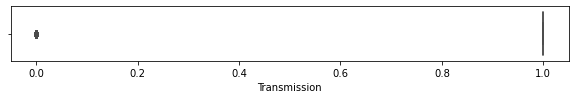

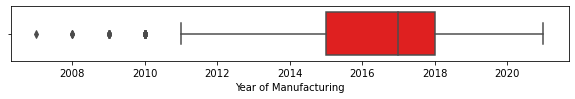

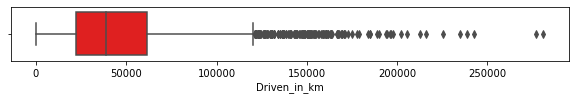

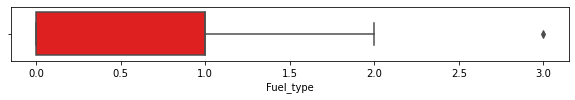

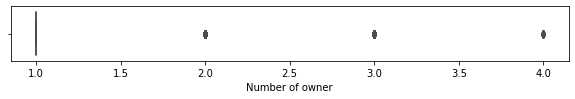

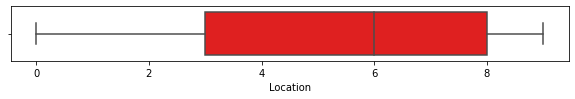

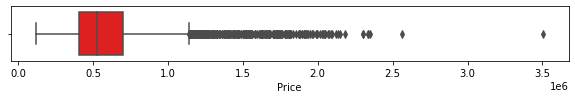

In [21]:
for i in df.columns:
    plt.figure(figsize=(10,1))
    sns.boxplot(df[i], color='r')
    plt.show()

We found the some of the features are having outliers and also skewed

### Checking Skewness

In [22]:
df.skew()

Model                    0.349663
Brand                   -0.214871
variant                 -0.493989
Transmission            -1.851620
Year of Manufacturing   -0.535023
Driven_in_km             1.587229
Fuel_type               -0.866160
Number of owner          2.033237
Location                -0.339333
Price                    2.196797
dtype: float64

Some features are skewed

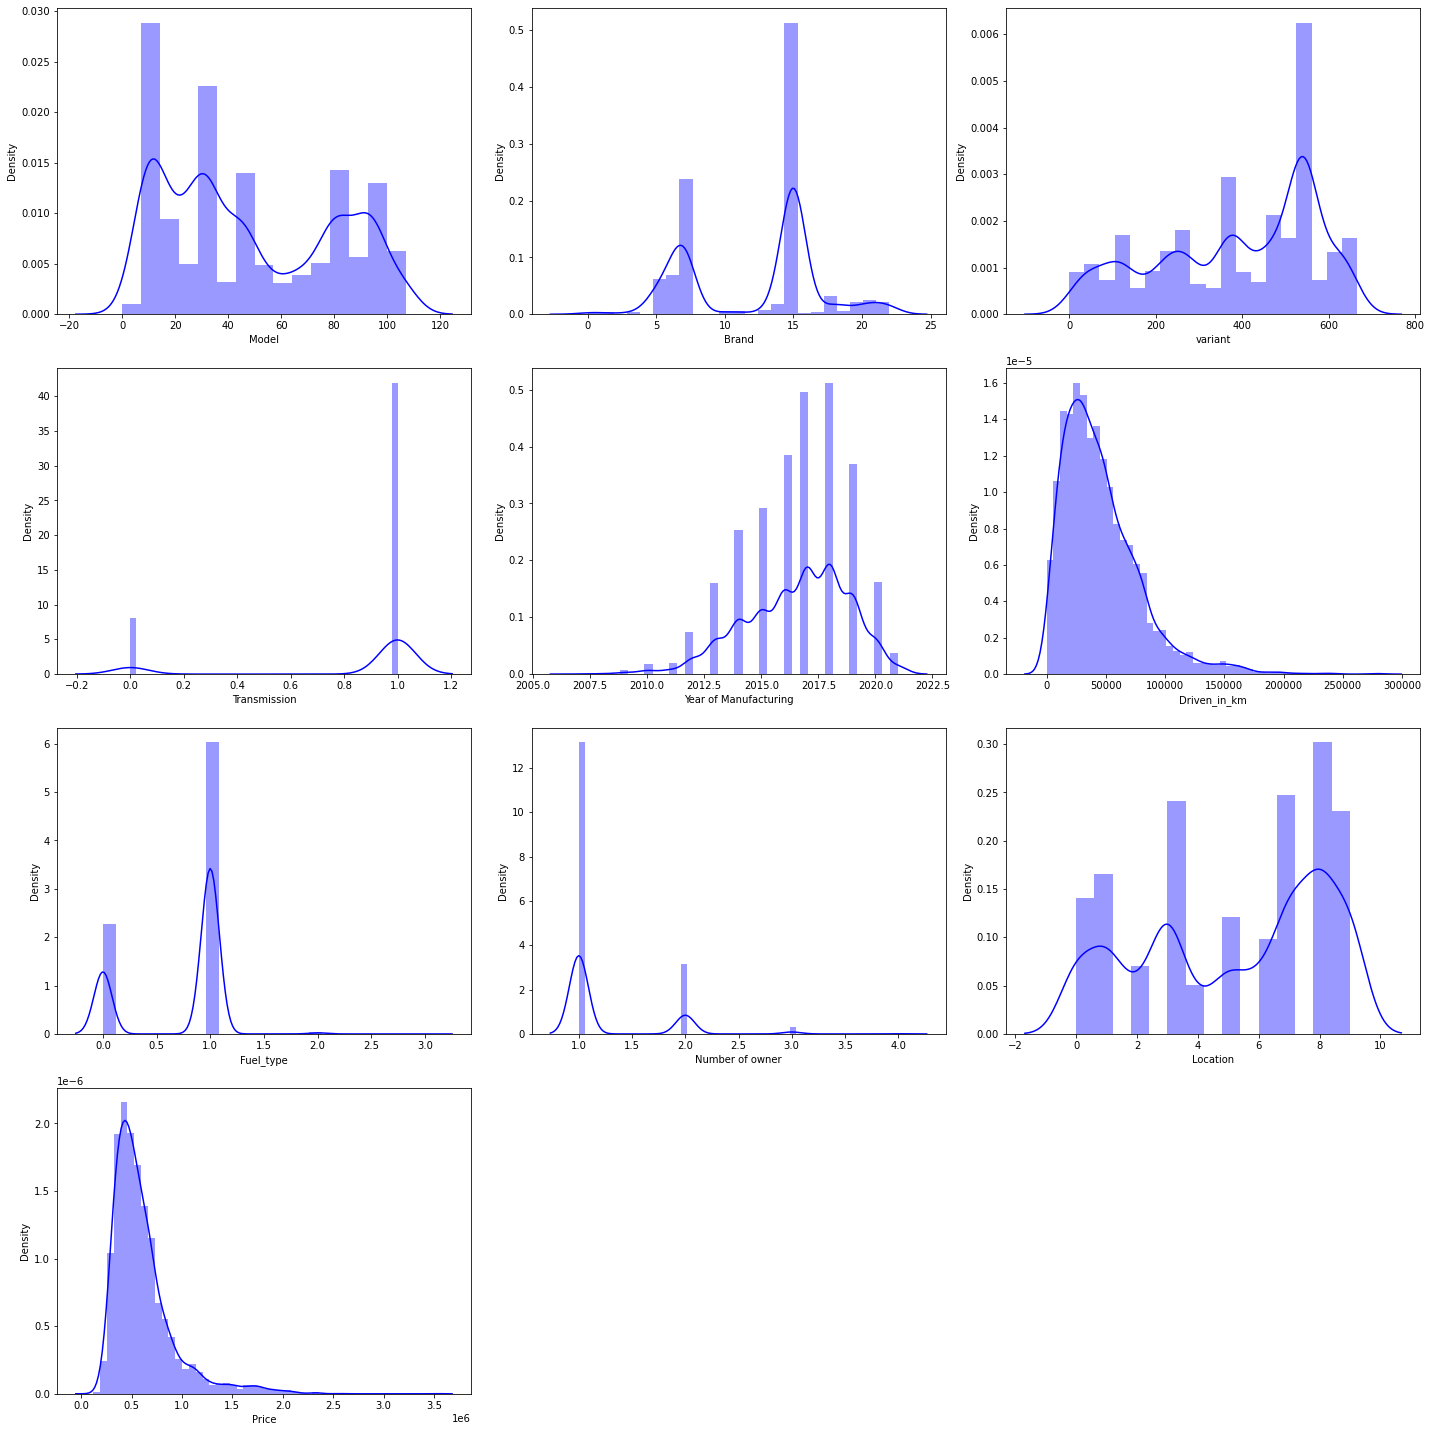

In [23]:
plt.figure(figsize=(20,20))
graph=1
for col in df.iloc[:]:
    if graph<11:
        plt.subplot(4,3,graph)
        sns.distplot(df[col],color='b')
    graph+=1
plt.tight_layout()

The above plots show the distribution curve and the skewness present in different features

### Correlation

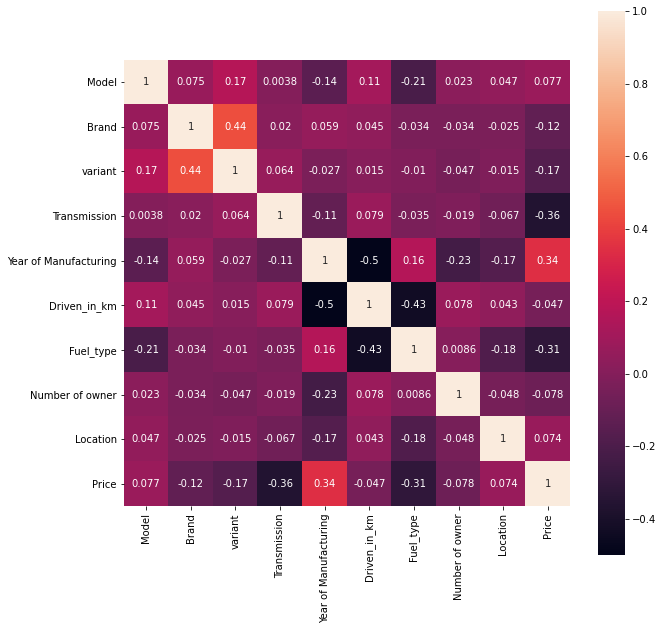

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

The above heat map shows how the features are correlated with each other 
- where the lighter color shows positive correlation
- where the darker color shows negetive correlation

### Split the dataset into features and target variables

In [16]:
# Independent Variables 
X=df.drop('Price', axis=1)
# Dependent Variables
y=df['Price']

- X = features
- y = target

### Scaling the features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = scaler.fit_transform(X)

Above I have scaled the features so that I can treat outliers as well as skewness at the same time

# 7. Model Building

#### Defining a function so that, it will be easy to call different regression algorithm.

In [18]:
# Let's find best score with best state
def beststate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(72,75):
        X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=i)
        mod.fit(X_train, y_train)
        y_pre = mod.predict(X_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best R2_Score          : ",max_score)
    print("Cross Validation Score : ",cross_val_score(mod, features, y, cv=5, scoring="r2").mean())
    end = time()
    print("\nTime taken by model for prediction {:.4f} seconds".format(end-start))

In [19]:
# K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
beststate(knr)

Best Random State      :  74
Best R2_Score          :  0.6655658259372805
Cross Validation Score :  0.5257732021800743

Time taken by model for prediction 0.5905 seconds


In [20]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
beststate(dt)

Best Random State      :  74
Best R2_Score          :  0.8492085742887497
Cross Validation Score :  0.664933605066609

Time taken by model for prediction 0.2792 seconds


In [21]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
beststate(rf)

Best Random State      :  73
Best R2_Score          :  0.890669956351274
Cross Validation Score :  0.8355559382258331

Time taken by model for prediction 14.5222 seconds


In [22]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
beststate(gbr)

Best Random State      :  73
Best R2_Score          :  0.8352141967789839
Cross Validation Score :  0.7771582566788507

Time taken by model for prediction 4.7571 seconds


# 8. Hyperparameter Tuning

#### Tuning best 2 models

In [32]:
# Hyper Parameter Tuning with Gradient Boosting Regressor

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=72)

from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_leaf" : [1,2,3],
              "min_samples_split" : [2,3,4],
              "n_estimators" : [100,200],
              "learning_rate" : [0.1,0.2]}
grid_search = GridSearchCV(gbr, param_grid=param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.2,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

r2_score : 0.8883970013368551


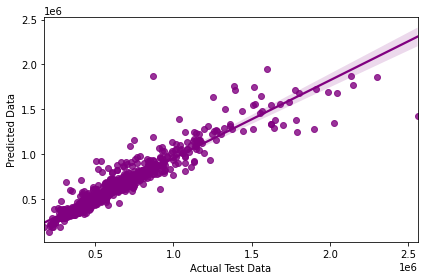

In [43]:
# Final Model
best_model = GradientBoostingRegressor(learning_rate=0.2,min_samples_split=2,min_samples_leaf=2,n_estimators=200)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=72)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("r2_score :",r2_score(y_test, y_pred))

sns.regplot(y_test,y_pred, color='purple')
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [25]:
# Hyper Parameter Tuning with Randomized SearchCV  (Random Forest Regressor)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=72)

from sklearn.model_selection import RandomizedSearchCV
rfg = RandomForestRegressor()

params = {'n_estimators':[13,15, 100, 200],
         'max_depth':[10,15, 20, 25],
         'min_samples_split':[5,6,7],
         'min_samples_leaf':[8,9,10]
         }

grid_search = RandomizedSearchCV(rfg, param_distributions=params)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_depth': 10}

r2_score : 0.7741258782085034


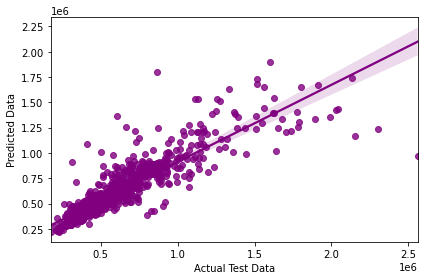

In [26]:
# Final Model
best_model_ = RandomForestRegressor(min_samples_split=5,min_samples_leaf=8,n_estimators=15, max_depth=10)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=72)
best_model_.fit(X_train, y_train)
y_pred_ = best_model_.predict(X_test)
print("r2_score :",r2_score(y_test, y_pred_))

sns.regplot(y_test,y_pred_, color='purple')
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

* Gradient Boost : r2_score : 0.8883970013368551
* Random Forest : r2_score : 0.7861033205753116

Hence, Gradient Boost is giving the best because it is giving higher r2 score and the cost function is also less in this case.

# 9. Save the Model

In [34]:
import joblib
joblib.dump(best_model,"Used Car Price Prediction.pkl")

['Used Car Price Prediction.pkl']

# 10. Prediction

In [35]:
y_output = best_model.predict(X_test)
np.round(y_output, decimals=2)

array([1150704.56,  524699.8 ,  276280.58,  383017.29,  785016.23,
        609992.41,  533753.17,  357554.54,  341939.72,  429592.67,
        524964.43,  688476.65,  247955.81, 1232630.59,  882163.72,
        688395.64,  697262.58,  777631.5 ,  435220.84,  674355.95,
        607806.95,  572356.31,  452454.51, 1122511.3 ,  704640.84,
        910737.43,  499886.51,  389297.48,  811734.1 ,  641523.96,
        512275.75, 1087274.96,  609239.26,  461829.77,  964235.34,
        823375.12,  976042.79, 1720584.69,  503317.69,  304317.88,
       1273805.36,  703794.84,  343466.28,  705883.4 ,  508741.49,
        469994.81,  622589.6 ,  690920.29,  511418.24,  533251.14,
        618861.53,  447199.51,  771245.04,  470628.16,  915719.57,
        412970.72,  340481.48,  691133.71,  599313.21,  586246.71,
        392092.7 ,  870529.25,  465024.15,  396389.97,  724892.33,
        452095.63,  974966.62,  537510.61,  700120.17,  540443.24,
        623335.31,  376568.87,  410995.95,  465232.55,  907766

In [36]:
df=pd.DataFrame({'Y Test':y_test,'Pred':np.round(y_pred, decimals=2)},columns=['Y Test','Pred'])
df.head()

,Y Test,Pred
2330,1165399,1150704.56
2965,528899,524699.80
3351,253599,276280.58
1489,365999,383017.29
648,942799,785016.23
